# <div align='center'>第5章 方差分析</div>
### 内容<br>
 <div align='left'>                  
     <font color='steelblue' size=4>
       5.1 单因素方差分析<br><br>     
       5.2 双因素方差分析<br><br>          
      </font>
</div>

------------------

## 5.1 单因素方差分析

#### 例1：
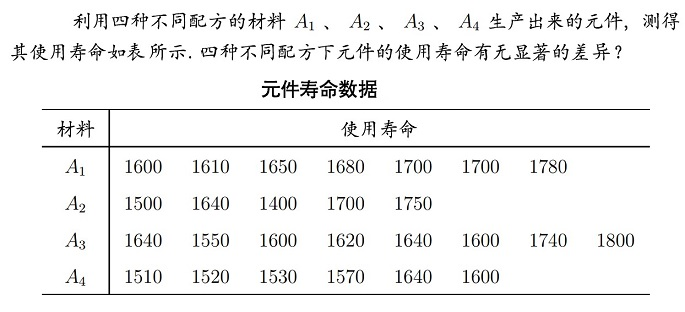

### 5.1.1 单因素方差分析示例

In [6]:
'''
导入所有必需的包
'''
%reset -f
import statsmodels.api as sm
from  statsmodels.stats.anova import anova_lm
import statsmodels.formula.api as smf
import statsmodels.stats.anova as sma

import numpy as np
import pandas as pd
import scipy.stats as st
import patsy
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
'''
手工计算单因素方差分析表的各变量。
计算过程相对简单。
'''
A1  = np.array([1600., 1610., 1650., 1680., 1700., 1700., 1780.],dtype='float')
A2 = np.array([1500., 1640., 1400.,1700., 1750.],dtype='float')
A3 = np.array([1640., 1550., 1600., 1620., 1640., 1600., 1740., 1800.],dtype='float')
A4  = np.array([1510.,1520., 1530., 1570., 1640., 1600.],dtype='float')
#数据总量
n=len(A1)+len(A2)+len(A3)+len(A4)
#水平数或组数
r=4
###各水平均值
mu1=np.mean(A1)
mu2=np.mean(A2)
mu3=np.mean(A3)
mu4=np.mean(A4)
#总均值
mu=(np.sum(A1)+np.sum(A2)+np.sum(A3)+np.sum(A4))/n
###组内平方和或误差平方和
se=np.sum((A1-mu1)**2)+np.sum((A2-mu2)**2)+np.sum((A3-mu3)**2)+np.sum((A4-mu4)**2)
###组间平方和或效应平方和
sa=len(A1)*(mu1-mu)**2+len(A2)*(mu2-mu)**2+len(A3)*(mu3-mu)**2+len(A4)*(mu4-mu)**2
###组内和组间均方，二者皆是实验数据方差的无偏估计。
mse=se/(n-r)
msa=sa/(r-1)
###F值
F=msa/mse
###F检验p值
pvalue=st.f.sf(F,r-1,n-r)

###打印各项统计量
print('                         单因素方差分析表')
print('方差来源    自由度    平方和           均方            F         P值')
print('因素A       %d       %0.6f    %0.6f    %0.6f   %0.6f'%(r-1,sa,msa,F,pvalue))
print('误差        %d      %0.6f   %0.6f    '%(n-r,se,mse))
print('总和        %d      %0.6f'%(n-1,se+sa))

                         单因素方差分析表
方差来源    自由度    平方和           均方            F         P值
因素A       3       49212.353480    16404.117827    2.165921   0.120838
误差        22      166622.261905   7573.739177    
总和        25      215834.615385


In [8]:
'''
调用Statsmodels实现方差分析
'''
###将水平与每个数据一一对应，然后生成DataFrame
levels = np.repeat(['A1','A2','A3','A4'],[7,5,8,6])
A = np.concatenate((A1,A2,A3,A4),axis=0)
Mat_lifetime = pd.DataFrame({'levels':levels,'Data':A})

###通过patsy的C函数对因素(水平)进行编码后，与数据进行线性回归拟合
data_lm = smf.ols('Data ~ C(levels,Sum)',data=Mat_lifetime).fit()

###通过Statsmodels的anova_lm函数对回归结果进行方差分析
table = sma.anova_lm(data_lm)
print('\n                ---------单因素方差表---------\n',table)

###显示回归结果
data_lm.summary()


                ---------单因素方差表---------
                   df         sum_sq       mean_sq         F    PR(>F)
C(levels, Sum)   3.0   49212.353480  16404.117827  2.165921  0.120838
Residual        22.0  166622.261905   7573.739177       NaN       NaN


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Data   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     2.166
Date:                Mon, 16 Aug 2021   Prob (F-statistic):              0.121
Time:                        12:35:12   Log-Likelihood:                -150.84
No. Observations:                  26   AIC:                             309.7
Df Residuals:                      22   BIC:                             314.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             1620.6756     17.331     93.514      0.000    1584.734    1656.618
C(levels, Sum)[S.A1]    53.6101     29.006      1.848      0.078      -6.544     113.765
C(levels, Sum)[S.A2]   -22.6756     32.523     -0.697      0.493     -90.124      44.773
C(levels, Sum)[S.A3]    28.0744     27.816      1.009      0.324     -29.612      85.761
==============================================================================
Omnibus:                        0.292   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.864   Jarque-Bera (JB):                0.001
Skew:                          -0.018   Prob(JB):                        0.999
Kurtosis:                       2.996   Cond. No.                         2.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
###使用patsy的dmatrix函数进行因素编码
np.array(patsy.dmatrix('C(levels, Sum)'))

array([[ 1.,  1.,  0.,  0.],
       [ 1.,  1.,  0.,  0.],
       [ 1.,  1.,  0.,  0.],
       [ 1.,  1.,  0.,  0.],
       [ 1.,  1.,  0.,  0.],
       [ 1.,  1.,  0.,  0.],
       [ 1.,  1.,  0.,  0.],
       [ 1.,  0.,  1.,  0.],
       [ 1.,  0.,  1.,  0.],
       [ 1.,  0.,  1.,  0.],
       [ 1.,  0.,  1.,  0.],
       [ 1.,  0.,  1.,  0.],
       [ 1.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  1.],
       [ 1., -1., -1., -1.],
       [ 1., -1., -1., -1.],
       [ 1., -1., -1., -1.],
       [ 1., -1., -1., -1.],
       [ 1., -1., -1., -1.],
       [ 1., -1., -1., -1.]])

### 5.1.2 均值多重比较
多重t检验，将多个水平的数据两两检验他们之间的均值是否相等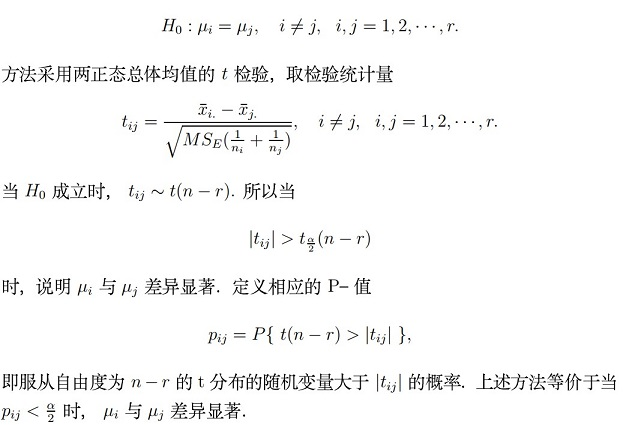


In [10]:
'''
手工计算均值多重比较t检验的t值及其p值。
以A1和A2为例。
'''
t21=(mu2-mu1)/(mse*(1/len(A1)+1/len(A2)))**0.5
tpvalue=2*st.t.cdf(t21,n-r)
print('A1与A2的均值进行逐一比较的t检验，t值：%0.6f,p值:%0.6f'%(t21,tpvalue))

A1与A2的均值进行逐一比较的t检验，t值：-1.497033,p值:0.148595


In [11]:
'''
首先可以调用回归结果对象的t_test_pairwise函数，以回归自变量项作为参数.
StatsModels原文如此：
The name of the term for which pairwise comparisons are computed.
Term names for categorical effects are created by patsy and
correspond to the main part of the exog names.
翻译过来是：成对比较的被计算条目名。分类效应的条目名是通过patsy创建的，
对应于自变量名字的主体部分。
按照本人理解：回归结果中的C(levels, Sum)[S.A1]是自变量名，其中C(levels, Sum)是主体部分。

另外：千万要注意t_test_pairwise函数里的字符串一定要和前面回归分析的变量名的主体部分一致，
甚至空格也要一致！！！否则将会报错：找不到该项。
'''
pm_results = data_lm.t_test_pairwise('C(levels, Sum)')#字符串参数一定要保持一致
pm_results.result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
A2-A1,-76.285714,50.957929,-1.497033,0.148595,-181.965992,29.394563,0.474534,False
A3-A1,-25.535714,45.040872,-0.566945,0.576491,-118.944765,67.873337,0.747732,False
A4-A1,-112.619048,48.417482,-2.326000,0.029630,-213.030760,-12.207335,0.165122,False
A3-A2,50.750000,49.613156,1.022914,0.317466,-52.141388,153.641388,0.682039,False
A4-A2,-36.333333,52.697606,-0.689468,0.497737,-145.621480,72.954813,0.747732,False
A4-A3,-87.083333,47.000077,-1.852834,0.077369,-184.555528,10.388861,0.331440,False


f:\users\hp\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


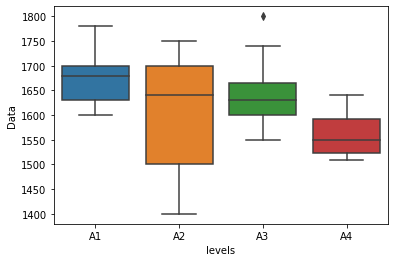

In [12]:
###通过水平箱线图也显示，每个水平的零件平均寿命无显著差异
sns.boxplot(Mat_lifetime.levels,Mat_lifetime.Data)
plt.show()

#### 例2：
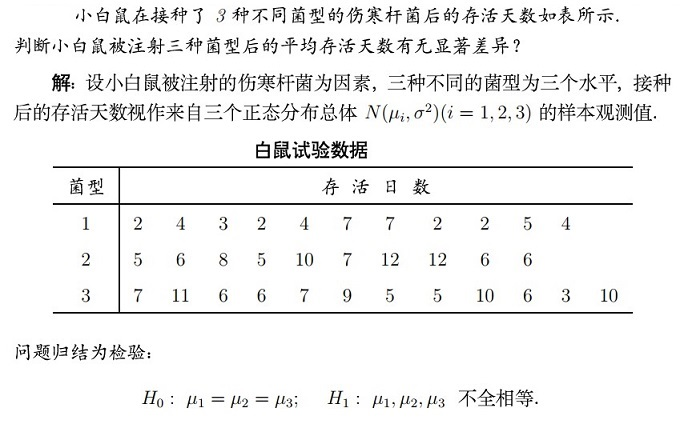

In [13]:
'''
均值不等的例子。
'''
M1  = np.array([2,4,3,2,4,7,7,2,2,5,4],dtype='float')
M2  = np.array([5,6,8,5,10,7,12,12,6,6],dtype='float')
M3  = np.array([7,11,6,6,7,9,5,5,10,6,3,10],dtype='float')
Mice_levels = np.repeat(['M1','M2','M3'],[11,10,12])
M = np.concatenate((M1,M2,M3),axis=0)
Mice_lifetime = pd.DataFrame({'levels':Mice_levels,'Data':M})

###通过patsy的C函数对因素(水平)进行编码后，与数据进行线性回归拟合
mice_lm = smf.ols('Data ~ C(levels,Sum)',data=Mice_lifetime).fit()

###通过Statsmodels的anova_lm函数对回归结果进行方差分析
table = sma.anova_lm(mice_lm, type=2)
print('\n                ---------单因素方差表---------\n',table)
pm_results1 = mice_lm.t_test_pairwise('C(levels, Sum)')#一定要保持一致
print('\n\n                ---------均值多重比较---------')
pm_results1.result_frame


                ---------单因素方差表---------
                   df      sum_sq    mean_sq        F    PR(>F)
C(levels, Sum)   2.0   94.256061  47.128030  8.48374  0.001202
Residual        30.0  166.653030   5.555101      NaN       NaN


                ---------均值多重比较---------


,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
M2-M1,3.881818,1.029815,3.769432,0.000717,1.778655,5.984981,0.002148,True
M3-M1,3.265152,0.983837,3.318795,0.002380,1.255889,5.274414,0.004754,True
M3-M2,-0.616667,1.009175,-0.611060,0.545762,-2.677678,1.444345,0.545762,False


f:\users\hp\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


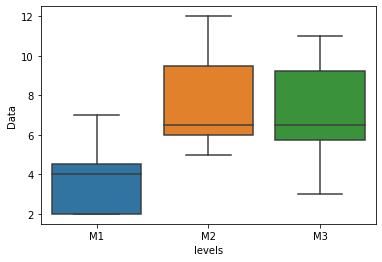

In [14]:
###通过水平的箱线图也显示，每个水平的白鼠生存天数还是存在差异的
sns.boxplot(Mice_lifetime.levels,Mice_lifetime.Data)
plt.show()

### 5.1.3 方差齐性检验


In [15]:
'''
方差齐性检验之前，一般需要对数据进行正态性检验
'''
###检验4种水平的零件寿命数据正态性
#根据p值可以看出，四种水平的数据都是正态分布的
st.shapiro(A1),st.shapiro(A2),st.shapiro(A3),st.shapiro(A4)

(ShapiroResult(statistic=0.9423453211784363, pvalue=0.6599273681640625),
 ShapiroResult(statistic=0.9384207129478455, pvalue=0.6547954082489014),
 ShapiroResult(statistic=0.8885940313339233, pvalue=0.22707131505012512),
 ShapiroResult(statistic=0.9176803827285767, pvalue=0.48881328105926514))

In [16]:
'''
有多种方法检验不同水平数据的方差齐性。
'''
print(st.bartlett(A1,A2,A3,A4))
print(st.levene(A1,A2,A3,A4))
print(st.fligner(A1,A2,A3,A4))

BartlettResult(statistic=5.805635751908388, pvalue=0.12145903158349065)
LeveneResult(statistic=1.7201147014597697, pvalue=0.19207528643451552)
FlignerResult(statistic=3.7143823041399804, pvalue=0.2940031998141424)


#### Bartlett检验


In [17]:
'''
以元件的使用寿命数据为例,编码实现Bartlett方差齐性检验函数。
'''

def bart_test(*data):    
    r=len(data)
    if r <=1:
        raise ValueError('数据应该大于1个水平',r)
    ni=[]
    ssi=[]###组内平方和（误差平方和）
    ssa=0###组间平方和（效应平方和）
    
    ###计算组内平方和
    for i in range(r):
        ni.append(len(data[i]))
        ssi.append(st.tvar(data[i]))
    n=np.sum(ni)
    
    ###转换成numpy的array类型，便于向量计算
    #注意Python的list类型不便于向量计算
    ni=np.array(ni)
    ssi=np.array(ssi)
    
    ###计算组间平方和
    for i in range(r):
        ssa+=(ni[i]-1)*ssi[i]
    ssa=ssa/(n-r) ###组间平方和的最终结果
    
    ###c值的计算
    c=1+(1/(3*(r-1)))*(np.sum(1/(ni-1))-1/(n-r))
    
    ###k平方的计算，即Bartlett统计量
    #注意《统计建模与R语言》p347的k平方公式有误
    k2=(1/c)*((n-r)*np.log(ssa)-np.sum((ni-1)*np.log(ssi)))
    
    ###p值计算，使用生存函数
    pvalue=st.chi2.sf(k2,r-1)
    return k2,pvalue

###使用元件使用寿命数据测试，结果与Scipy的bartlett函数一致
bart_test(A1,A2,A3,A4)

(5.805635751908388, 0.12145903158349065)

### 5.1.4 Kruskal-Wallis秩和检验



#### 例3：
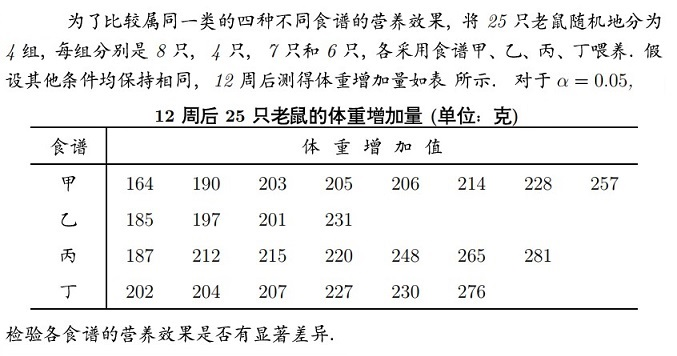

In [18]:
M1=np.array([164, 190, 203, 205, 206, 214, 228, 257])
M2=np.array([185, 197, 201,231])
M3=np.array([187, 212, 215, 220, 248, 265, 281])
M4=np.array([202, 204, 207, 227, 230, 276])
###scipy的kruskal函数调用和bartlett调用一样容易
#结果显示p值远大于0.05，所以不能拒绝各水平数据无显著差异的原假设
st.kruskal(M1,M2,M3,M4)

KruskalResult(statistic=4.212967032967043, pvalue=0.23936684175023165)

#### Kruskal-Wallis秩和检验

In [19]:
'''
按照上述数学公式计算K-W检验的统计量和p值。
此方法没有假设数据的分布和方差齐性前提，
因此功能很强大，使用也很广泛。
'''
###首先将4个水平的数据合并一起计算秩
#这点很重要，不是分别计算各水平的秩
r=st.rankdata(np.hstack((M1,M2,M3,M4)))
###4水平数据各自的长度
ni=np.array([len(M1),len(M2),len(M3),len(M4)])
n=np.sum(ni)###总长度
num_levels=len(ni)###水平数

###生成每个水平所对应的数据索引的起始点和结束点的，然后进行切片操作
#但是要加一个0，也就是第1个水平的秩起始点
ind=np.cumsum(ni) #[ 8, 12, 19, 25]
ind=np.insert(ind,0,0) #[ 0,  8, 12, 19, 25]

###初始化秩和/长度的
ri=np.zeros(num_levels)

###将r中的秩对应每个水平进行切片取出
#然后对每个水平的数据的秩求和，最后除以该水平数据的长度
for i in range(len(ni)):
    ri[i]=np.sum(r[ind[i]:ind[i+1]])/ni[i]

###计算K统计量
K=(12/(n*(n+1)))*np.sum((ni*(ri-(n+1)/2)**2))
###计算p值，使用卡方分布，自由度：水平数-1
pvalue=st.chi2.sf(K,num_levels-1)
K,pvalue

(4.212967032967034, 0.2393668417502328)

### 5.1.5 Friedman秩和检验


#### 例4：
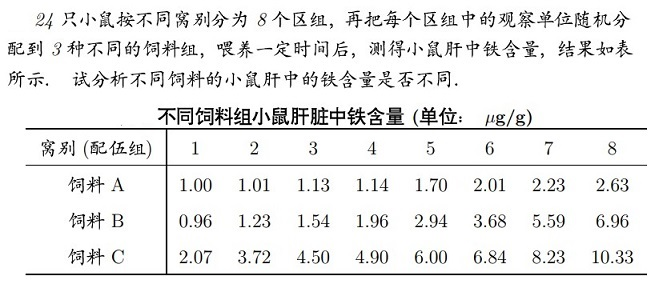

In [20]:
'''
Friedman秩和检验
'''
Mice = np.array([1.00, 1.01, 1.13, 1.14, 1.70, 2.01, 2.23, 2.63,
                  0.96, 1.23, 1.54, 1.96, 2.94, 3.68, 5.59, 6.96,
                  2.07, 3.72, 4.50, 4.90, 6.00, 6.84, 8.23, 10.33])
M2_1 = Mice[0:8]
M2_2 = Mice[8:16]
M2_3 = Mice[16:]
st.friedmanchisquare(M2_1,M2_2,M2_3)

FriedmanchisquareResult(statistic=14.25, pvalue=0.000804733010124613)

-----

## 5.2 双因素方差分析
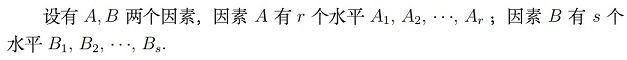

### 5.2.1 不考虑交互作用的双因素方差分析


#### 例5：
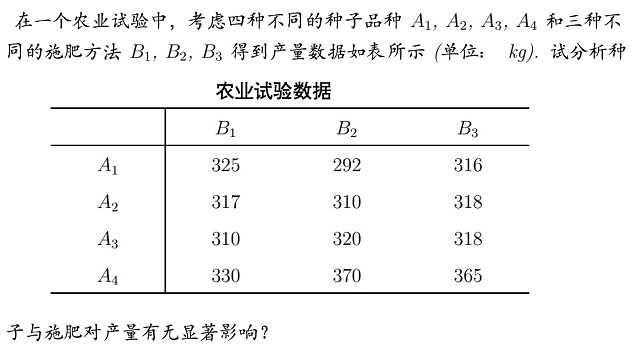

In [21]:
'''
双因素方差分析在某种程度上将就是单因素方差分析的扩展。
'''
y = np.array([325, 292, 316, 317, 310, 318,  310, 320, 318, 330, 370, 365])

###注意水平的对应顺序，和表格里的数据要对应上
A = np.array([1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4])
B = np.array([1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3])
agri = pd.DataFrame({'y':y,'A':A,'B':B})

###仍是使用线性回归，需要对A和B的因子水平进行编码
agri_lm = smf.ols('y ~ C(A, Sum)+C(B, Sum)', data=agri).fit()
table = anova_lm(agri_lm)
print(table)

            df   sum_sq      mean_sq         F    PR(>F)
C(A, Sum)  3.0  3824.25  1274.750000  5.226170  0.041262
C(B, Sum)  2.0   162.50    81.250000  0.333106  0.729149
Residual   6.0  1463.50   243.916667       NaN       NaN


#### 结果解读
- 在方差分析表中有2个因素即品种和施肥方法，分别对应回归分析中的2个自变量。自变量是Category编码的设计矩阵。

- 根据p值可以看出，A因素即品种的显著性水平很高，即种子品种对产量有显著影响。B因素，即施肥方法对产量没有显著影响。

- 可以尝试使用上面列出来的数学公式，计算双因素的F统计量及其检验的p值。

In [22]:
###因子化后的数据形式
agri

,y,A,B
0,325,1,1
1,292,1,2
2,316,1,3
3,317,2,1
4,310,2,2
5,318,2,3
6,310,3,1
7,320,3,2
8,318,3,3
9,330,4,1


### 5.2.2 考虑交互作用的双因素方差分析



#### 例6：

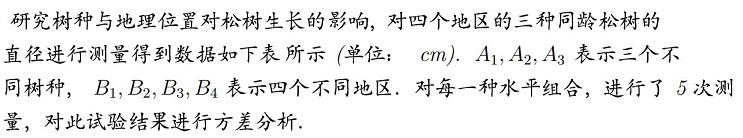

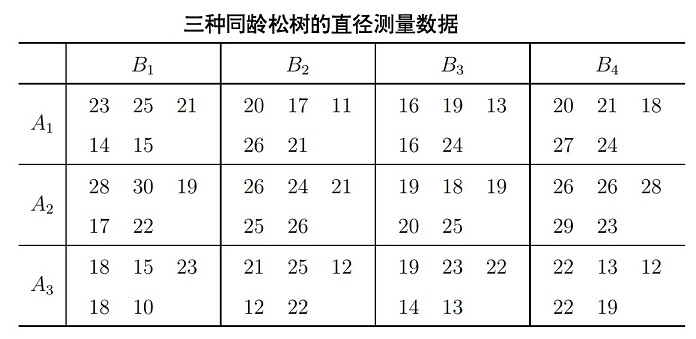

In [23]:
'''
双因素方差分析（重复实验数据），还要考虑到2个因素之间的交互关系
'''
y = np.array([23, 25, 21, 14, 15, 20, 17, 11, 26, 21, 
              16, 19, 13, 16, 24, 20, 21, 18, 27, 24,
              28, 30, 19, 17, 22, 26, 24, 21, 25, 26,
              19, 18, 19, 20, 25, 26, 26, 28, 29, 23,
              18, 15, 23, 18, 10, 21, 25, 12, 12, 22, 
              19, 23, 22, 14, 13, 22, 13, 12, 22, 19])
A = np.repeat([1,2,3],[20,20,20])
B_1 =np.repeat([1,2,3,4],[5,5,5,5])
###因素B的水平对照稍微有点麻烦，因为要考虑每个重复试验的次数
B= np.concatenate((B_1,B_1,B_1))
trees = pd.DataFrame({'y':y,'A':A,'B':B})
###注意交互关系表示形式
tree_lm = smf.ols('y ~ C(A, Sum)*C(B, Sum)', data=trees).fit()
table = anova_lm(tree_lm, typ=2)
print(table)

                         sum_sq    df         F    PR(>F)
C(A, Sum)            352.533333   2.0  8.958916  0.000494
C(B, Sum)             87.516667   3.0  1.482705  0.231077
C(A, Sum):C(B, Sum)   71.733333   6.0  0.607652  0.722890
Residual             944.400000  48.0       NaN       NaN


In [24]:
###回归分析的结果
tree_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     2.365
Date:                Mon, 16 Aug 2021   Prob (F-statistic):             0.0200
Time:                        12:35:19   Log-Likelihood:                -167.82
No. Observations:                  60   AIC:                             359.6
Df Residuals:                      48   BIC:                             384.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        20.2833      0.573     35.421      0.000      19.132      21.435
C(A, Sum)[S.1]                   -0.7333      0.810     -0.906      0.370      -2.362       0.895
C(A, Sum)[S.2]                    3.2667      0.810      4.034      0.000       1.638       4.895
C(B, Sum)[S.1]                   -0.4167      0.992     -0.420      0.676      -2.411       1.578
C(B, Sum)[S.2]                    0.3167      0.992      0.319      0.751      -1.678       2.311
C(B, Sum)[S.3]                   -1.6167      0.992     -1.630      0.110      -3.611       0.378
C(A, Sum)[S.1]:C(B, Sum)[S.1]     0.4667      1.403      0.333      0.741      -2.354       3.287
C(A, Sum)[S.2]:C(B, Sum)[S.1]     0.0667      1.403      0.048      0.962      -2.754       2.887
C(A, Sum)[S.1]:C(B, Sum)[S.2]    -0.8667      1.403     -0.618      0.540      -3.687       1.954
C(A, Sum)[S.2]:C(B, Sum)[S.2]     0.5333      1.403      0.380      0.705      -2.287       3.354
C(A, Sum)[S.1]:C(B, Sum)[S.3]    -0.3333      1.403     -0.238      0.813      -3.154       2.487
C(A, Sum)[S.2]:C(B, Sum)[S.3]    -1.7333      1.403     -1.236      0.223      -4.554       1.087
==============================================================================
Omnibus:                        5.746   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.057   Jarque-Bera (JB):                2.322
Skew:                          -0.070   Prob(JB):                        0.313
Kurtosis:                       2.046   Cond. No.                         3.46
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
#各因素各水平数据的正态性检验
print('因素A水平1的正态性检验：',st.shapiro(y[A==1]))
print('因素A水平2的正态性检验：',st.shapiro(y[A==2]))
print('因素A水平3的正态性检验：',st.shapiro(y[A==3]))
print('因素B水平1的正态性检验：',st.shapiro(y[B==1]))
print('因素B水平2的正态性检验：',st.shapiro(y[B==2]))
print('因素B水平3的正态性检验：',st.shapiro(y[B==3]))
print('因素B水平4的正态性检验：',st.shapiro(y[B==4]))

因素A水平1的正态性检验： ShapiroResult(statistic=0.9758586287498474, pvalue=0.8702935576438904)
因素A水平2的正态性检验： ShapiroResult(statistic=0.9438899755477905, pvalue=0.28368762135505676)
因素A水平3的正态性检验： ShapiroResult(statistic=0.9106301665306091, pvalue=0.06552256643772125)
因素B水平1的正态性检验： ShapiroResult(statistic=0.9835260510444641, pvalue=0.9880000948905945)
因素B水平2的正态性检验： ShapiroResult(statistic=0.8537424802780151, pvalue=0.019627654924988747)
因素B水平3的正态性检验： ShapiroResult(statistic=0.948333740234375, pvalue=0.4986009895801544)
因素B水平4的正态性检验： ShapiroResult(statistic=0.9451896548271179, pvalue=0.45210620760917664)


In [26]:
#各因素数据的方差齐性检验
print("因素A的方差齐性检验（Bartlett方法）：",st.bartlett(y[A==1],y[A==2],y[A==3]))
print("因素B的方差齐性检验（Bartlett方法）：",st.bartlett(y[B==1],y[B==2],y[B==3],y[B==4]))

因素A的方差齐性检验（Bartlett方法）： BartlettResult(statistic=0.5900002171357336, pvalue=0.7445315066337076)
因素B的方差齐性检验（Bartlett方法）： BartlettResult(statistic=2.043625626141553, pvalue=0.5634015923679045)


-------------